In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('../input/dev-set/Dev_data_to_be_shared.csv')
df2 = pd.read_csv('/kaggle/input/test-data/validation_data_to_be_shared.csv')

df2.head()

,account_number,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,transaction_attribute_8,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,100001,34000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN
1,100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,100003,130000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
3,100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100005,53000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df.describe()

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
count,96806.000000,96806.000000,7.157500e+04,71575.000000,71575.000000,71575.000000,71575.000000,71575.000000,71575.000000,71575.000000,...,94212.0,94212.000000,94212.000000,94212.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000
mean,48403.500000,0.014173,1.542391e+05,9.570769,0.002207,4.092854,77.306435,0.006315,67.043550,0.081034,...,0.0,0.189657,0.044283,7.800673,0.588114,1.497158,0.545650,1.430491,0.121447,0.119208
std,27945.629417,0.118203,1.729925e+05,1513.967595,0.119240,301.580599,3164.987013,0.129545,2516.330899,14.203615,...,0.0,0.597298,0.369451,8.655149,1.059613,1.702795,1.055865,1.728950,0.601256,0.599697
min,1.000000,0.000000,2.500000e+04,0.000000,0.000000,0.000000,-109800.476600,0.000000,-3498.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24202.250000,0.000000,5.900000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,48403.500000,0.000000,1.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,72604.750000,0.000000,1.810000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,11.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000
max,96806.000000,1.000000,2.800000e+06,398936.791000,25.000000,55000.000000,358986.000000,12.000000,358986.000000,3150.000000,...,0.0,18.000000,14.000000,102.000000,19.000000,38.000000,19.000000,38.000000,15.000000,15.000000


In [44]:
# Replace NaN values with the mean of their respective columns
df.fillna(df.mean(), inplace=True)
df2.fillna(df.mean(), inplace=True)



In [40]:
# Check if there are any remaining missing values
df.isnull().sum()


account_number             0
onus_attribute_1           0
transaction_attribute_1    0
transaction_attribute_2    0
transaction_attribute_3    0
                          ..
onus_attribute_44          0
onus_attribute_45          0
onus_attribute_46          0
onus_attribute_47          0
onus_attribute_48          0
Length: 1215, dtype: int64

In [41]:
Class = 'bad_flag'

In [6]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df[Class].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df[Class].value_counts()[1],2), '% of the dataset')

No Frauds 98.58 % of the dataset
Frauds 1372 % of the dataset


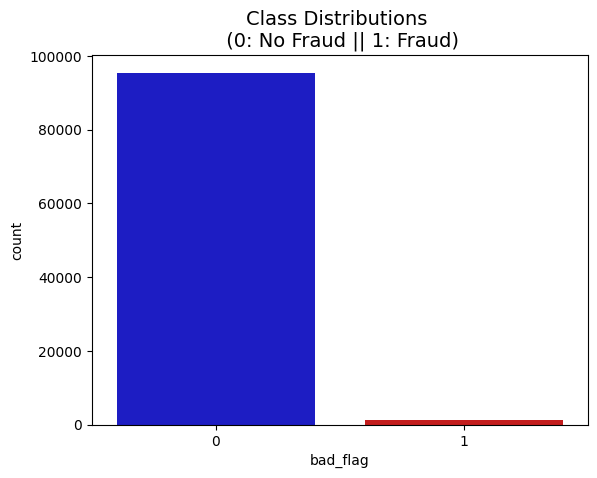

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#0101DF", "#DF0101"]

sns.countplot(x="bad_flag", data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df[Class].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df[Class].value_counts()[1],2), '% of the dataset')

X = df.drop(Class, axis=1)
y = df[Class]

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 98.58 % of the dataset
Frauds 1372 % of the dataset
Train: [18109 18148 18311 ... 96803 96804 96805] Test: [    0     1     2 ... 19375 19376 19377]
Train: [    0     1     2 ... 96803 96804 96805] Test: [18109 18148 18311 ... 38729 38730 38731]
Train: [    0     1     2 ... 96803 96804 96805] Test: [37842 37853 37923 ... 58081 58082 58093]
Train: [    0     1     2 ... 96803 96804 96805] Test: [58083 58084 58085 ... 77857 78049 78066]
Train: [    0     1     2 ... 77857 78049 78066] Test: [77439 77440 77441 ... 96803 96804 96805]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.98583511 0.01416489]
[0.98579619 0.01420381]


In [45]:
# Drop columns with NaN values
df2 = df2.dropna(axis=1, how='any')

# Display the updated DataFrame without NaN columns
print(df2.head())


   account_number  onus_attribute_1  transaction_attribute_1  \
0          100001      34000.000000                 0.000000   
1          100002     154239.119804                 9.570769   
2          100003     130000.000000                 0.000000   
3          100004     154239.119804                 9.570769   
4          100005      53000.000000                 0.000000   

   transaction_attribute_2  transaction_attribute_3  transaction_attribute_4  \
0                 0.000000                 0.000000                 0.000000   
1                 0.002207                 4.092854                77.306435   
2                 0.000000                 0.000000                 0.000000   
3                 0.002207                 4.092854                77.306435   
4                 0.000000                 0.000000                 0.000000   

   transaction_attribute_5  transaction_attribute_6  transaction_attribute_7  \
0                 0.000000                  0.00000   

In [22]:
# Drop columns with NaN values
df = df.dropna(axis=1, how='any')

# Display the updated DataFrame without NaN columns
print(df.head())


       account_number  bad_flag  onus_attribute_1  transaction_attribute_1  \
87523           87524         0          133000.0                      0.0   
31025           31026         0           64000.0                      0.0   
58093           58094         1          403000.0                      0.0   
94967           94968         0          250000.0                      0.0   
18846           18847         0           67000.0                      0.0   

       transaction_attribute_2  transaction_attribute_3  \
87523                      0.0                      0.0   
31025                      0.0                      0.0   
58093                      0.0                      0.0   
94967                      0.0                      0.0   
18846                      0.0                      0.0   

       transaction_attribute_4  transaction_attribute_5  \
87523                      0.0                      0.0   
31025                      0.0                      0.0   

In [23]:
new_df.fillna(new_df.mean(), inplace=True)

In [ ]:
new_df2.fillna(new_df2.mean(), inplace=True)

In [24]:
# Find all columns with NaN values in the entire DataFrame
columns_with_nan_all = new_df.columns[new_df.isna().any()].tolist()

# Display the columns with NaN values
print(f"Columns with NaN values: {columns_with_nan_all}")


Columns with NaN values: ['bureau_436', 'bureau_447']


In [48]:
df2.isnull().sum().sum()


0

In [ ]:
# df2 = df2.sample(frac=1)


# fraud_df2 = df.loc[df[Class] == 1]
# non_fraud_df = df.loc[df[Class] == 0][:1372]

# normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# # Shuffle dataframe rows
# new_df = normal_distributed_df.sample(frac=1, random_state=42)

# new_df.head()


In [16]:
df = df.sample(frac=1)


fraud_df = df.loc[df[Class] == 1]
non_fraud_df = df.loc[df[Class] == 0][:1372]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()


,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
24140,24141,1,264000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,6.0,0.588114,1.497158,0.54565,1.430491,0.121447,0.119208
53847,53848,0,95000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.588114,1.497158,0.54565,1.430491,0.121447,0.119208
66549,66550,1,108000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.588114,1.497158,0.54565,1.430491,0.121447,0.119208
41577,41578,1,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,0.588114,1.497158,0.54565,1.430491,0.121447,0.119208
34491,34492,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,4.0,0.588114,1.497158,0.54565,1.430491,0.121447,0.119208


In [47]:
# Drop columns with NaN values
df2 = df2.dropna(axis=1, how='any')

# Display the updated DataFrame without NaN columns
print(df2.head())


   account_number  onus_attribute_1  transaction_attribute_1  \
0          100001      34000.000000                 0.000000   
1          100002     154239.119804                 9.570769   
2          100003     130000.000000                 0.000000   
3          100004     154239.119804                 9.570769   
4          100005      53000.000000                 0.000000   

   transaction_attribute_2  transaction_attribute_3  transaction_attribute_4  \
0                 0.000000                 0.000000                 0.000000   
1                 0.002207                 4.092854                77.306435   
2                 0.000000                 0.000000                 0.000000   
3                 0.002207                 4.092854                77.306435   
4                 0.000000                 0.000000                 0.000000   

   transaction_attribute_5  transaction_attribute_6  transaction_attribute_7  \
0                 0.000000                  0.00000   

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(new_df[Class].value_counts()/len(new_df))



sns.countplot(x=Class, data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [ ]:
correlations = sub_sample_corr[Class].drop(Class, errors='ignore')  # Exclude self-correlation
correlations.plot(kind='hist', bins=30, title='Correlation Distribution with Class')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmaps
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 20))

# Entire DataFrame correlation matrix
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size': 20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

# Subsample DataFrame correlation matrix
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size': 20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

# Extract columns positively and negatively correlated with 'Class'
threshold = 0.2  # Define a threshold for correlation
positive_corr_cols = sub_sample_corr[Class][sub_sample_corr[Class] > threshold].index.tolist()
negative_corr_cols = sub_sample_corr[Class][sub_sample_corr[Class] < -threshold].index.tolist()

# Remove 'Class' from the lists as we don't want to include the correlation with itself
positive_corr_cols.remove(Class) if Class in positive_corr_cols else None
negative_corr_cols.remove(Class) if Class in negative_corr_cols else None

# Output the results
print("Columns positively correlated with Class:")
print(positive_corr_cols)

print("\nColumns negatively correlated with Class:")
print(negative_corr_cols)


In [ ]:
plt.show()

In [ ]:
positive_corr_cols

In [ ]:
# Define your threshold
correlation_threshold = 0.2

# Extract features with correlations above/below the threshold
correlations = sub_sample_corr[Class].drop(Class, errors='ignore')  # Exclude 'Class' itself
selected_features = correlations[(correlations.abs() > correlation_threshold)].index.tolist()

# Add the target variable for training
selected_features.append(Class)

print(f"Features selected for training: {selected_features}")


In [ ]:
# from sklearn.impute import SimpleImputer

# # Replace NaN values with the mean of each column
# imputer = SimpleImputer(strategy='mean')  # Change strategy to 'median' or 'constant' if needed
# X_imputed = imputer.fit_transform(X)  # X is your dataset (features)

# print(X_imputed)


In [ ]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop(Class, axis=1)
y = new_df[Class]


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

In [ ]:
# this cell cluster happens
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [ ]:
X

In [27]:
X = new_df.drop(Class, axis=1)
y = new_df[Class]

In [28]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [50]:
X_tests=df2.values

In [33]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  # If using SVM, remember to set probability=True
    # Add more classifiers as needed
}


In [34]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 68.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 73.0 % accuracy score
Classifiers:  SVC Has a training score of 62.0 % accuracy score


In [35]:
import pandas as pd
from sklearn.model_selection import cross_val_score

# Dictionary to store predictions
results = {}

# Train classifiers and collect predicted probabilities
for key, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # # Evaluate cross-validation accuracy (optional, for reference)
    # training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    # print(f"Classifier: {key} has a training score of {round(training_score.mean() * 100, 2)}% accuracy score")
    
    # Get predicted probabilities on the test set
    prob_predictions = classifier.predict_proba(X_test)[:, 1]  # Take probability of the positive class
    results[key] = prob_predictions

# Convert results to a DataFrame
ensemble_df = pd.DataFrame(results)

# Optional: Add an ensemble column (average of all predictions)
ensemble_df['Ensemble_Probability'] = ensemble_df.mean(axis=1)

# Save to CSV
ensemble_df.to_csv('model_predictions.csv', index=False)

print("Predicted probabilities have been saved to 'model_predictions.csv'")


Predicted probabilities have been saved to 'model_predictions.csv'


In [60]:
X_tests

array([[1.00001000e+05, 3.40000000e+04, 0.00000000e+00, ...,
        1.43049096e+00, 1.21447028e-01, 1.19207580e-01],
       [1.00002000e+05, 1.54239120e+05, 9.57076900e+00, ...,
        1.43049096e+00, 1.21447028e-01, 1.19207580e-01],
       [1.00003000e+05, 1.30000000e+05, 0.00000000e+00, ...,
        1.43049096e+00, 1.21447028e-01, 1.19207580e-01],
       ...,
       [1.41790000e+05, 1.55000000e+05, 0.00000000e+00, ...,
        1.43049096e+00, 1.21447028e-01, 1.19207580e-01],
       [1.41791000e+05, 9.90000000e+04, 0.00000000e+00, ...,
        1.43049096e+00, 1.21447028e-01, 1.19207580e-01],
       [1.41792000e+05, 1.31000000e+05, 0.00000000e+00, ...,
        1.43049096e+00, 1.21447028e-01, 1.19207580e-01]])

In [56]:
import pandas as pd

# Dictionary to store predictions
resultss = {}

# Use already trained classifiers and collect predicted probabilities
for key, classifier in classifiers.items():
    # Get predicted probabilities on the test set
    prob_predictions = classifier.predict_proba(X_tests)[:, 1]  # Take probability of the positive class
    resultss[key] = prob_predictions

# Convert results to a DataFrame
ensemble_df = pd.DataFrame(resultss)

# Optional: Add an ensemble column (average of all predictions)
ensemble_df['Ensemble_Probability'] = ensemble_df.mean(axis=1)

# Rename the ensemble column to 'bad_flag'
ensemble_df.rename(columns={'Ensemble_Probability': 'bad_flag'}, inplace=True)

# Assuming 'account_number' is in the X_test DataFrame or is available as part of the dataset
# You may need to adjust if 'account_number' is in a different DataFrame or format.
# ensemble_df['account_number'] = X_tests['account_number']

# Set 'account_number' as the index
# ensemble_df.set_index('account_number', inplace=True)

# Save to CSV, excluding the index column
ensemble_df[['bad_flag']].to_csv('model_predictions.csv')

print("Predicted probabilities have been saved to 'model_predictions.csv'")


Predicted probabilities have been saved to 'model_predictions.csv'


In [62]:
ensemble_df['account_number'] = df2['account_number']

In [63]:
ensemble_df[['account_number', 'bad_flag']].to_csv('results.csv', index=False)

print("Predicted probabilities have been saved to 'model_predictions.csv'")

Predicted probabilities have been saved to 'model_predictions.csv'


In [ ]:
# from sklearn.model_selection import GridSearchCV


# # Logistic Regression 
# log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



# grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
# grid_log_reg.fit(X_train, y_train)
# # We automatically get the logistic regression with the best parameters.
# log_reg = grid_log_reg.best_estimator_

# knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
# grid_knears.fit(X_train, y_train)
# # KNears best estimator
# knears_neighbors = grid_knears.best_estimator_

# # Support Vector Classifier
# svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
# grid_svc = GridSearchCV(SVC(), svc_params)
# grid_svc.fit(X_train, y_train)

# # SVC best estimator
# svc = grid_svc.best_estimator_

# # DecisionTree Classifier
# tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
#               "min_samples_leaf": list(range(5,7,1))}
# grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
# grid_tree.fit(X_train, y_train)

# # tree best estimator
# tree_clf = grid_tree.best_estimator_